In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df =pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


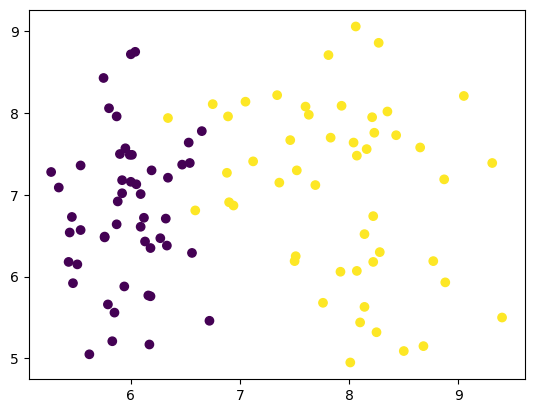

In [8]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [11]:
X =df.iloc[:,0:2].values
y =df.iloc[:,-1].values

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model =Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.get_weights()

[array([[ 0.60013485,  0.09554455,  1.4071062 , -0.6593187 , -0.5146585 ,
          1.324385  ,  0.7998932 , -1.8432846 , -0.36892968,  0.4432062 ],
        [-0.4901046 , -1.0406666 ,  0.44667968,  1.1430879 , -1.0109917 ,
         -0.3064687 ,  1.2844648 , -1.3474371 , -0.51503706,  1.0588473 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.10250538,  0.8431595 , -0.3865894 ,  0.9384427 , -0.44395807,
          0.3512676 ,  0.27708438,  0.10543429, -0.34517768, -0.19665809],
        [-0.37068397,  0.46578532, -0.06023256, -0.516509  ,  0.12971771,
         -0.09941044,  0.00316458, -0.20615152,  0.40496036,  0.962397  ],
        [-0.38790718, -0.5013409 , -0.8379623 ,  0.38028428,  0.69395924,
         -0.9426887 , -0.56216973, -0.4710801 ,  0.32772934,  0.6164676 ],
        [ 0.02073323,  0.24652703, -0.809442  ,  0.6833716 ,  0.01116643,
         -0.29556236, -0.24490464, -0.22039892,  0.49941775,  0.69603187],
        [ 0.17714

In [23]:
initial_weights =model.get_weights()

In [24]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [26]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[ 0.5412313 ,  0.39205813,  0.52141327,  0.4118138 ,  0.14618722,
          0.32010847,  0.01380153,  0.749967  , -1.2041001 ,  0.07749258],
        [-0.77910286,  0.5002567 ,  1.4792817 , -0.59086585, -0.6280027 ,
          0.66084117, -0.6665432 ,  0.03707404, -1.4000479 ,  1.7015936 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.14615321, -0.46118808,  0.18634228, -0.23454948,  0.19196172,
          0.04785627, -0.10281757,  0.14509489,  0.02480306, -0.08912055],
        [ 0.46842325, -0.5784994 ,  0.04023202, -0.42646074,  0.11755878,
         -0.17410146, -0.48904487, -0.3677484 ,  0.29192862, -0.06951112],
        [ 0.04865864, -0.00604786,  0.19417593, -0.24436468, -0.5779571 ,
          0.30563974, -0.04505607, -0.72536236,  0.03804785,  0.37944657],
        [-0.1759168 , -0.1878259 , -0.29464668, -0.12342719,  0.1184168 ,
          0.22296087,  0.28302327,  0.41315892, -0.09588373, -0.55359036],
        [ 0.25409

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history =model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 729ms/step - accuracy: 0.4859 - loss: 1.1110 - val_accuracy: 0.5500 - val_loss: 0.9373
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5289 - loss: 0.9709 - val_accuracy: 0.5500 - val_loss: 0.8932
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5211 - loss: 0.9266 - val_accuracy: 0.5500 - val_loss: 0.8545
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5094 - loss: 0.9129 - val_accuracy: 0.5500 - val_loss: 0.8211
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4938 - loss: 0.8872 - val_accuracy: 0.5500 - val_loss: 0.7928
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4820 - loss: 0.8738 - val_accuracy: 0.5500 - val_loss: 0.7689
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4781 - loss: 0.8370 - val_accuracy: 0.5500 - val_loss: 0.7488
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4625 - loss: 0.8268 - val_accuracy: 0.5500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

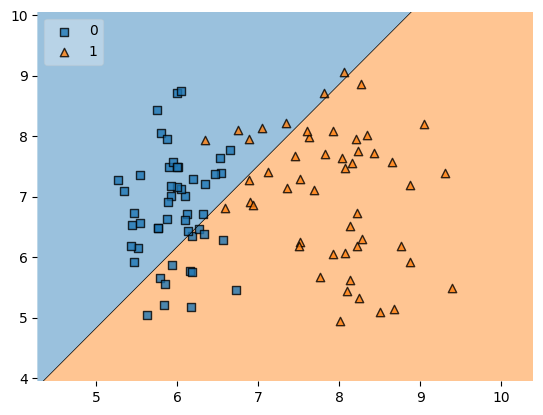

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)